# Lista 3

In [210]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from scipy import signal


import matplotlib.style as style 

plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['figure.figsize'] = 7, 5
plt.rcParams['text.usetex'] = True

# Exemplo 5.2 do livro

Rejeita banda
M = 50

$\Omega_{c1} = \pi/4$ rad/s 

$\Omega_{c2} = \pi/2$ rad/s 

$\Omega_{s} = 2 \pi$ rad/s

Usando as equação (5.48) e (5.49)

In [211]:
M = 50
wc1 = np.pi/4
wc2 = np.pi/2
ws = 2*np.pi
n = np.arange(1, int(M/2))
h0 = 1 - (wc2 - wc1)/np.pi

In [212]:
haux= (np.sin(wc1*n) - np.sin(wc2*n))/(np.pi * n)

In [213]:
haux = np.reshape(haux, (1, len(haux)))

In [214]:
p1 = np.append(np.fliplr(haux), np.array(h0))

In [215]:
h = np.append(p1, haux)

In [216]:
x = h

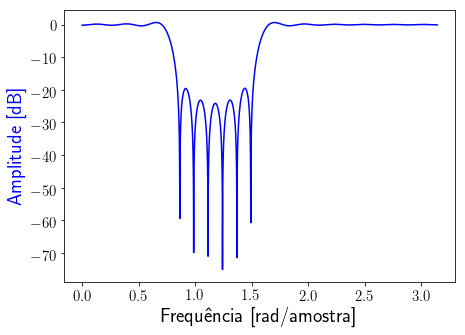

In [217]:
w, h = signal.freqz(x, worN=M*120)

fig, ax1 = plt.subplots()

ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel(r'Amplitude [dB]', color='b')
ax1.set_xlabel(r'Frequência [rad/amostra]')


plt.show()

# Example 5.3

Bandstop filter satisfying the specification below using the rectangular, Hamming, Hann and Black windows.

In [218]:
M = 80
Omega_c1 = 2000
Omega_c2 = 4000
Omega_s = 10000
wc1 = Omega_c1*2*np.pi/Omega_s
wc2 = Omega_c2*2*np.pi/Omega_s

### Rectangular window

In [219]:
n = np.arange(1, int(M/2) + 1)
h0 = 1 - (wc2 - wc1)/np.pi
haux= (np.sin(wc1*n) - np.sin(wc2*n))/(np.pi * n)
b = np.reshape(haux, (1, len(haux)))
p1 = np.append(np.fliplr(b), np.array(h0))
h = np.append(p1, haux)

In [220]:
np.shape(h)

(81,)

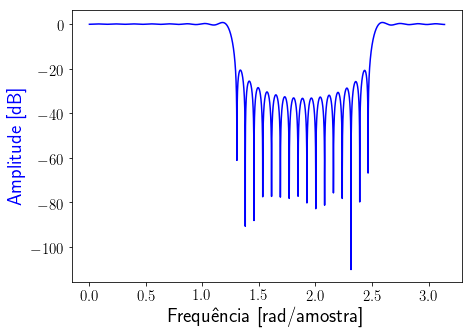

In [221]:
w, x = signal.freqz(h, worN=M*120)

fig, ax1 = plt.subplots()

ax1.plot(w, 20 * np.log10(abs(x)), 'b')
ax1.set_ylabel(r'Amplitude [dB]', color='b')
ax1.set_xlabel(r'Frequência [rad/amostra]')


plt.show()

### Windows (Hamming, Hanning, Blackman and Kaiser)

In [222]:
def _len_guards(M):
    """Handle small or incorrect window lengths"""
    if int(M) != M or M < 0:
        raise ValueError('Window length M must be a non-negative integer')
    return M <= 1

def _truncate(w, needed):
    """Truncate window by 1 sample if needed for DFT-even symmetry"""
    if needed:
        return w[:-1]
    else:
        return w

def _extend(M, sym):
    """Extend window by 1 sample if needed for DFT-even symmetry"""
    if not sym:
        return M + 1, True
    else:
        return M, False

def general_cosine(M, a, sym=True):
    if _len_guards(M):
        return np.ones(M)
    M, needs_trunc = _extend(M, sym)

    fac = np.linspace(-np.pi, np.pi, M)
    w = np.zeros(M)
    for k in range(len(a)):
        w += a[k] * np.cos(k * fac)

    return _truncate(w, needs_trunc)



def general_hamming(M, alpha, sym=True):
    return general_cosine(M, [alpha, 1. - alpha], sym)

def hamming(M, sym=True):
    return general_hamming(M, 0.54, sym)

def hann(M, sym=True):
    return general_hamming(M, 0.5, sym)

from scipy import special
def kaiser(M, beta, sym=True):
    if _len_guards(M):
        return np.ones(M)
    M, needs_trunc = _extend(M, sym)

    n = np.arange(0, M)
    alpha = (M - 1) / 2.0
    w = (special.i0(beta * np.sqrt(1 - ((n - alpha) / alpha) ** 2.0)) /
         special.i0(beta))

    return _truncate(w, needs_trunc)

def blackman(M, sym=True):
    return general_cosine(M, [0.42, 0.50, 0.08], sym)


In [223]:
hamming_window = hamming(M+1)

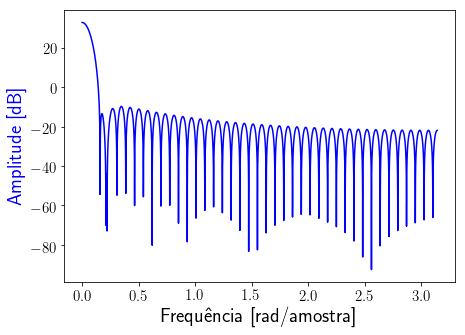

In [224]:
w, x = signal.freqz(hamming_window, worN=M*120)

fig, ax1 = plt.subplots()

ax1.plot(w, 20 * np.log10(abs(x)), 'b')
ax1.set_ylabel(r'Amplitude [dB]', color='b')
ax1.set_xlabel(r'Frequência [rad/amostra]')


plt.show()

In [225]:
hamming_stopband = np.multiply(h, hamming_window)

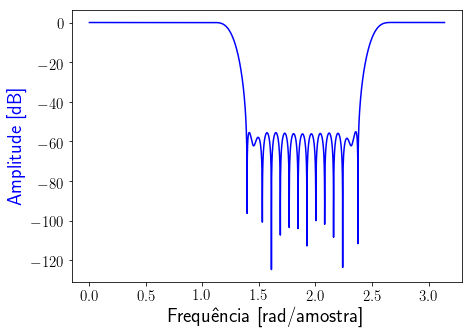

In [226]:
w, x = signal.freqz(hamming_stopband, worN=M*120)

fig, ax1 = plt.subplots()

ax1.plot(w, 20 * np.log10(abs(x)), 'b')
ax1.set_ylabel(r'Amplitude [dB]', color='b')
ax1.set_xlabel(r'Frequência [rad/amostra]')


plt.show()

In [227]:
hann_window = hann(M+1)
hann_stopband = np.multiply(h, hann_window)

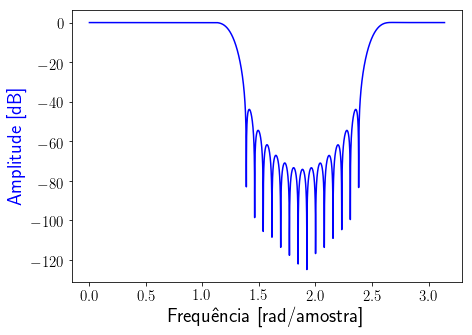

In [228]:
w, x = signal.freqz(hann_stopband, worN=M*120)

fig, ax1 = plt.subplots()

ax1.plot(w, 20 * np.log10(abs(x)), 'b')
ax1.set_ylabel(r'Amplitude [dB]', color='b')
ax1.set_xlabel(r'Frequência [rad/amostra]')


plt.show()

In [229]:
blackman_window = blackman(M+1)

In [230]:
black_stopband = np.multiply(h, blackman_window)

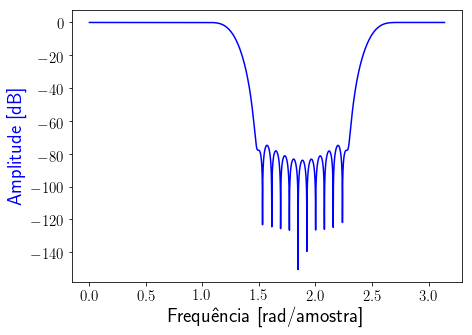

In [231]:
w, x = signal.freqz(black_stopband, worN=M*120)

fig, ax1 = plt.subplots()

ax1.plot(w, 20 * np.log10(abs(x)), 'b')
ax1.set_ylabel(r'Amplitude [dB]', color='b')
ax1.set_xlabel(r'Frequência [rad/amostra]')


plt.show()

## Agora um passa-banda

Pegando as especificações do Example 5.8

In [232]:
M = 50
Ap = 1
Ar = 40

Omega_r1 = np.pi/2 - 0.4
Omega_r2 = np.pi/2 + 0.4

wr1 = Omega_r1/np.pi
wr2 = Omega_r2/np.pi
print(Omega_r1, Omega_r2)

1.1707963267948966 1.9707963267948965


In [233]:
sanity_check_window = signal.firwin(M+1, [wr1, wr2], window='boxcar', pass_zero=False)

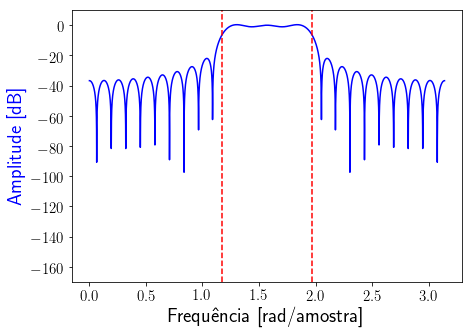

In [234]:
w, x = signal.freqz(sanity_check_window, worN=M*120)

fig, ax1 = plt.subplots()

ax1.plot(w, 20 * np.log10(abs(x)), 'b')
ax1.axvline(x=Omega_r1, color='r', linestyle='--')
ax1.axvline(x=Omega_r2, color='r', linestyle='--')
ax1.set_ylabel(r'Amplitude [dB]', color='b')
ax1.set_xlabel(r'Frequência [rad/amostra]')
ax1.set_ylim(-170,10)
plt.savefig('rect_linha_milao.eps', transparent=True, optimize=True, bbox_inches='tight')



plt.show()

Hamming

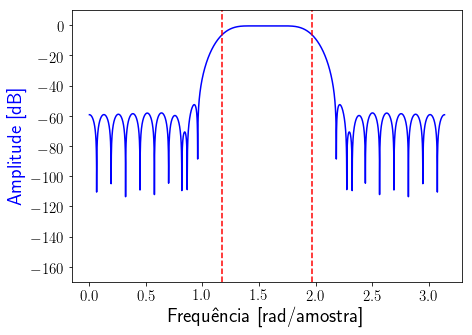

In [235]:
hamming_window = hamming(M+1)
hamming_stopband = np.multiply(sanity_check_window, hamming_window)

w, x = signal.freqz(hamming_stopband, worN=M*120)

fig, ax1 = plt.subplots()

ax1.plot(w, 20 * np.log10(abs(x)), 'b')
ax1.axvline(x=Omega_r1, color='r', linestyle='--')
ax1.axvline(x=Omega_r2, color='r', linestyle='--')
ax1.set_ylabel(r'Amplitude [dB]', color='b')
ax1.set_xlabel(r'Frequência [rad/amostra]')
ax1.set_ylim(-170,10)
plt.savefig('hamming_linha_milao.eps', transparent=True, optimize=True, bbox_inches='tight')


plt.show()

Hann

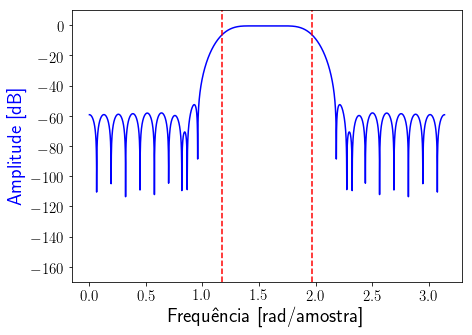

In [236]:
hann_window = hann(M+1)
hanning_stopband = np.multiply(sanity_check_window, hamming_window)

w, x = signal.freqz(hanning_stopband, worN=M*120)

fig, ax1 = plt.subplots()

ax1.plot(w, 20 * np.log10(abs(x)), 'b')
ax1.axvline(x=Omega_r1, color='r', linestyle='--')
ax1.axvline(x=Omega_r2, color='r', linestyle='--')
ax1.set_ylabel(r'Amplitude [dB]', color='b')
ax1.set_xlabel(r'Frequência [rad/amostra]')
ax1.set_ylim(-170,10)
plt.savefig('hann_linha_milao.eps', transparent=True, optimize=True, bbox_inches='tight')



plt.show()

Blackman

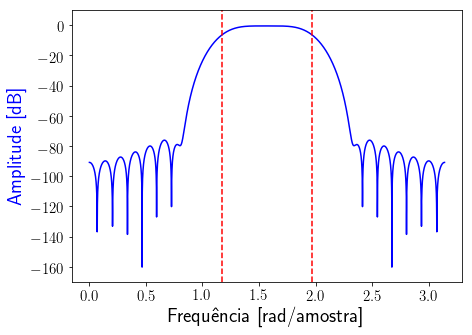

In [237]:
blackman_window = blackman(M+1)
black_stopband = np.multiply(sanity_check_window, blackman_window)

w, x = signal.freqz(black_stopband, worN=M*120)

fig, ax1 = plt.subplots()

ax1.plot(w, 20 * np.log10(abs(x)), 'b')
ax1.axvline(x=Omega_r1, color='r', linestyle='--')
ax1.axvline(x=Omega_r2, color='r', linestyle='--')
ax1.set_ylabel(r'Amplitude [dB]', color='b')
ax1.set_xlabel(r'Frequência [rad/amostra]')
ax1.set_ylim(-170,10)
plt.savefig('blackman_linha_milao.eps', transparent=True, optimize=True, bbox_inches='tight')


plt.show()

Kaiser

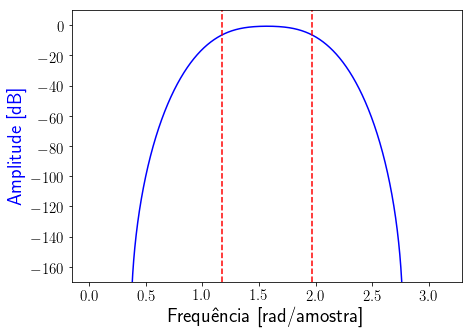

In [257]:
kaiser_window = kaiser(M+1, beta=20)
kaiser_stopband = np.multiply(sanity_check_window, kaiser_window)

w, x = signal.freqz(kaiser_stopband, worN=M*120)

fig, ax1 = plt.subplots()

ax1.plot(w, 20 * np.log10(abs(x)), 'b')
ax1.axvline(x=Omega_r1, color='r', linestyle='--')
ax1.axvline(x=Omega_r2, color='r', linestyle='--')
ax1.set_ylabel(r'Amplitude [dB]', color='b')
ax1.set_xlabel(r'Frequência [rad/amostra]')
ax1.set_ylim(-170,10)
plt.savefig('kaiser_20.eps', transparent=True, optimize=True, bbox_inches='tight')


plt.show()